In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
path = "/content/gdrive/MyDrive/DATA Science 1/Artificial Intelligence/Project/Salmon_Trout_edit_2/Salmon_Trout"
print(os.listdir(path))

['validation', 'train', 'test']


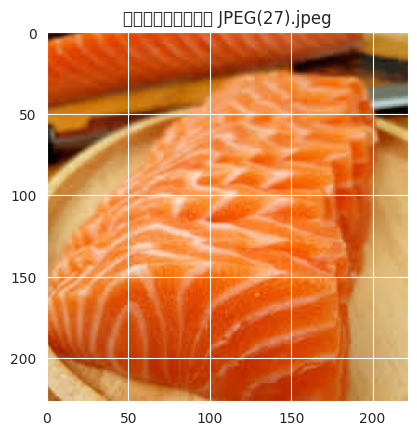

In [ ]:
import random
from tensorflow.keras.utils import load_img
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

filename_paper = os.listdir(path+"/train/Salmon")
sample = random.choice(filename_paper)
image = load_img(path+"/train/Salmon/"+sample)
plt.title(sample)
plt.imshow(image)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_set = datagen.flow_from_directory(path+'/train', target_size=(64, 64), batch_size=18, class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(path+'/validation', target_size=(64, 64), batch_size=8, class_mode='binary', shuffle=False)
test_set = val_datagen.flow_from_directory(path+'/test', target_size=(64, 64), batch_size=8, class_mode='binary', shuffle=False)

Found 1372 images belonging to 2 classes.
Found 294 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


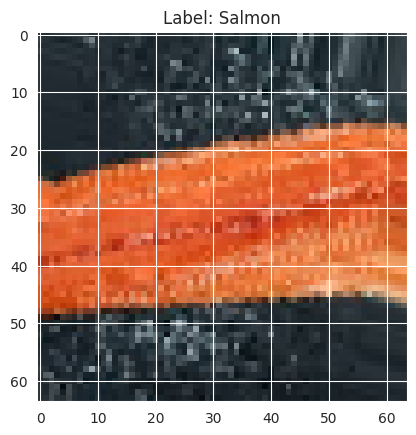

In [ ]:
X_train_batch, y_train_batch = next(train_set)

image_to_display = X_train_batch[0]
class_labels = {v: k for k, v in train_set.class_indices.items()}

plt.imshow(image_to_display)
plt.axis('on')
plt.title(f'Label: {class_labels[int(y_train_batch[0])]}')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_129 (Conv2D)                  │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_193              │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_129 (MaxPooling2D)     │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_130 (Conv2D)                  │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_194              │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_130 (MaxPooling2D)     │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_61          │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_195              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,257 (94.75 KB)

 Trainable params: 23,937 (93.50 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_set.classes), y=train_set.classes )
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [ ]:
history = model.fit(train_set, validation_data=val_set, epochs=30, class_weight=class_weight_dict, callbacks=[early_stopping, learning_rate_reduction])

Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 332ms/step - accuracy: 0.5162 - loss: 1.6042 - val_accuracy: 0.5000 - val_loss: 1.4030 - learning_rate: 1.0000e-04
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 295ms/step - accuracy: 0.6179 - loss: 1.4049 - val_accuracy: 0.4694 - val_loss: 1.3998 - learning_rate: 1.0000e-04
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - accuracy: 0.6197 - loss: 1.3917 - val_accuracy: 0.4932 - val_loss: 1.3775 - learning_rate: 1.0000e-04
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 318ms/step - accuracy: 0.6506 - loss: 1.3160 - val_accuracy: 0.5374 - val_loss: 1.3522 - learning_rate: 1.0000e-04
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - accuracy: 0.6468 - loss: 1.3464 - val_accuracy: 0.5714 - val_loss: 1.3665 - learning_rate: 1.0000e-04
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - accuracy: 0.6621 - loss: 1.2884 - val_accuracy: 0.5442 - val_loss: 1.4029 - learning_rate: 1.0000e-04
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accu

# Accuracy

In [ ]:
val_loss, val_accuracy = model.evaluate(val_set)
print(f"validation accuracy: {val_accuracy * 100:.2f}%")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6388 - loss: 1.2610
validation accuracy: 59.52%


In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

 3/37 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6389 - loss: 1.2338

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.6065 - loss: 1.2979
Test accuracy: 59.52%


# Learning Curve

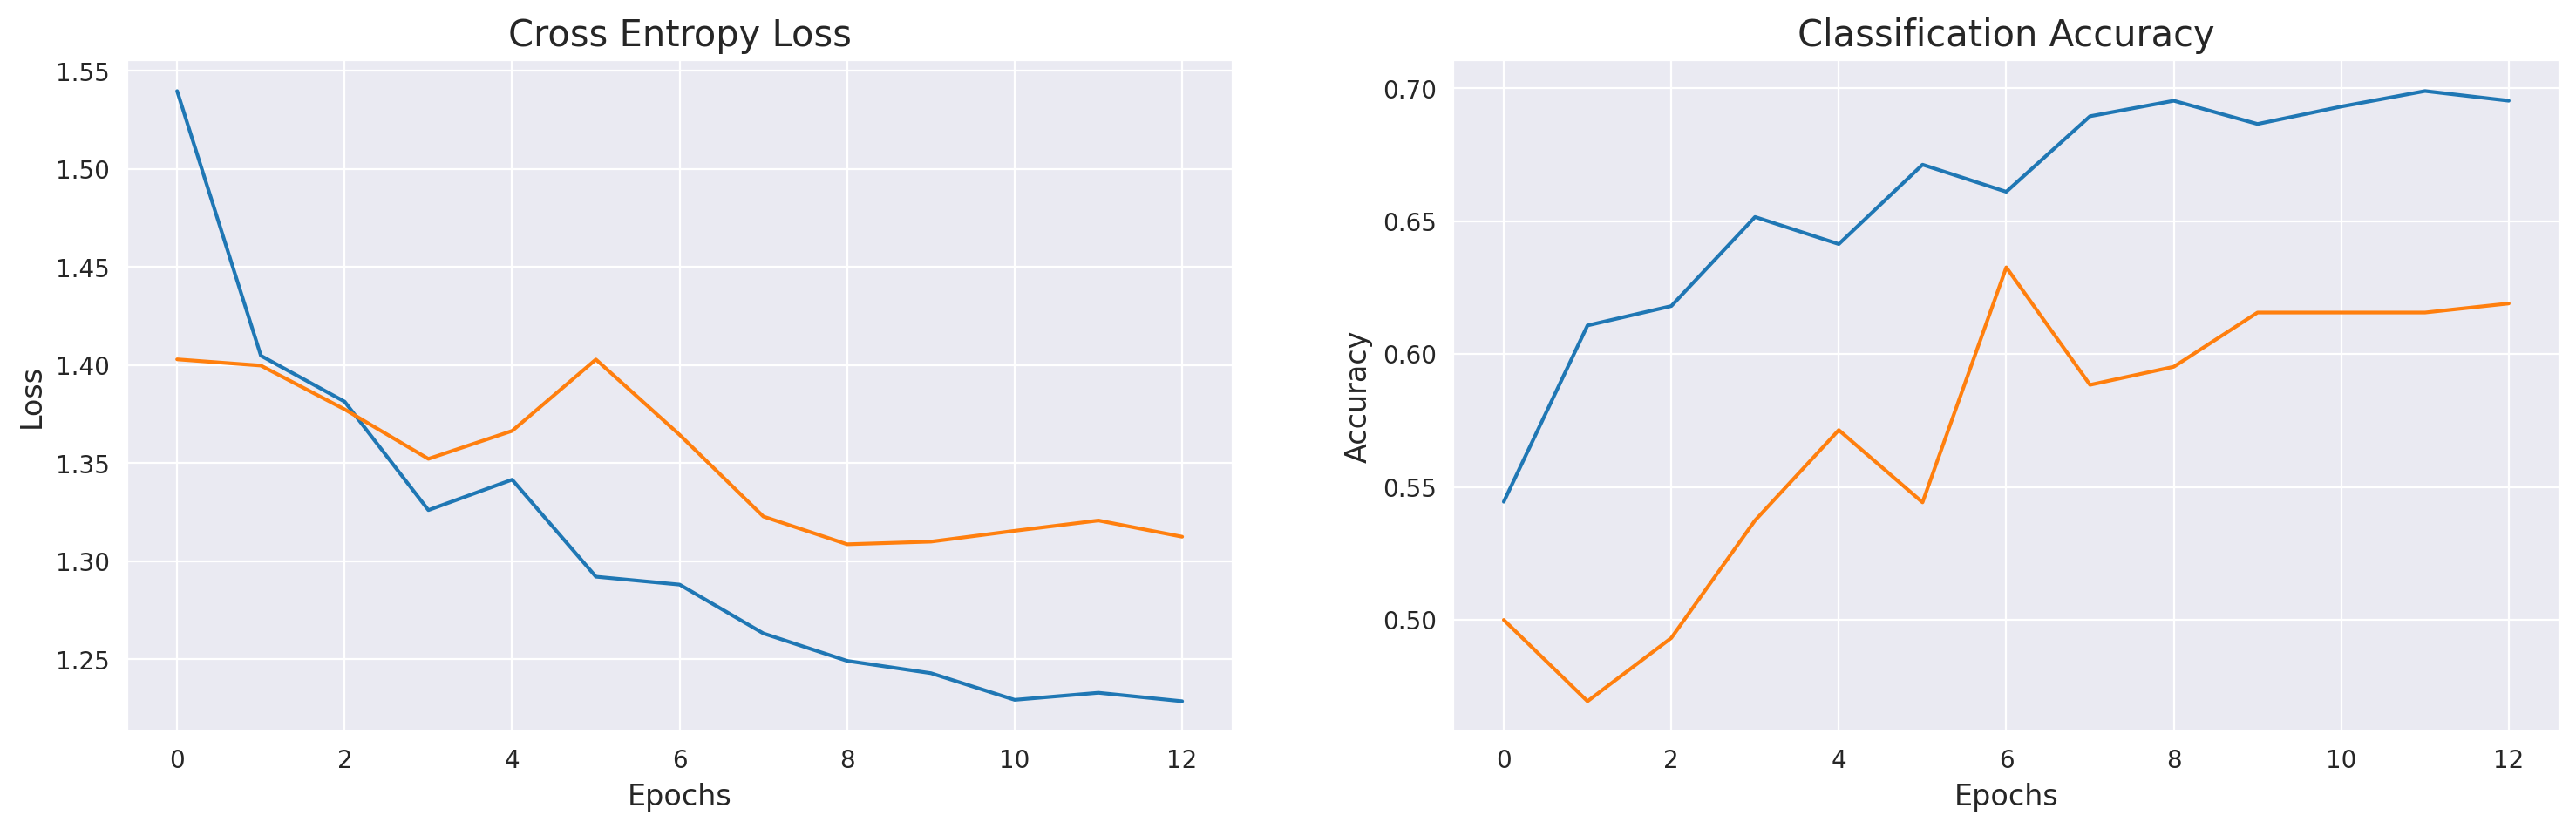

In [ ]:
import pandas as pd
import seaborn as sns

error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

# Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Confusion Matrix:
[[93 54]
 [65 82]]


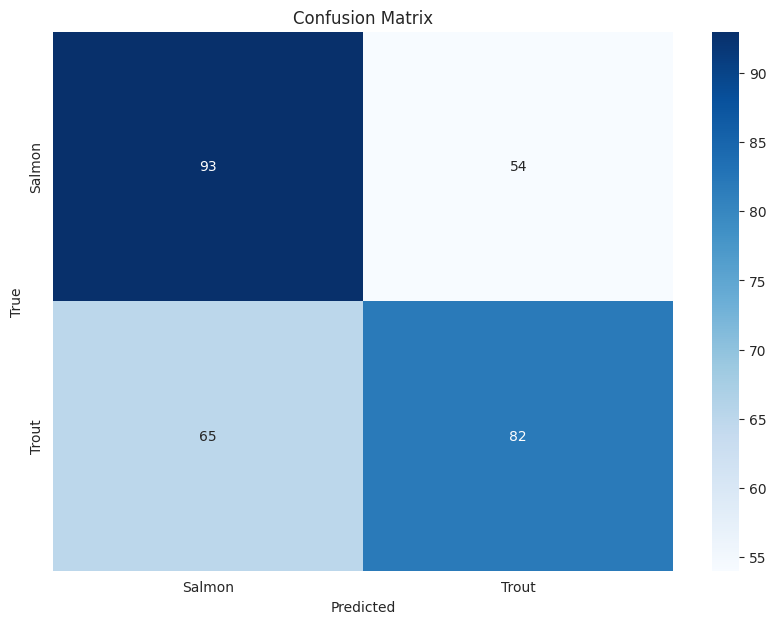

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_test, y_test = [], []
for _ in range(len(test_set)):
    x_batch, y_batch = next(test_set)
    X_test.append(x_batch)
    y_test.append(y_batch)

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [ ]:
report = classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys())
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Salmon       0.59      0.63      0.61       147
       Trout       0.60      0.56      0.58       147

    accuracy                           0.60       294
   macro avg       0.60      0.60      0.59       294
weighted avg       0.60      0.60      0.59       294



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction result: [[0.717468]]
Predicted class: Trout


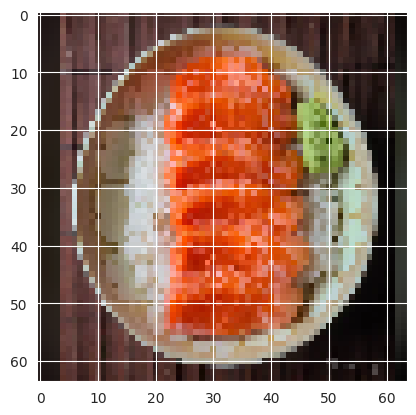

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/DATA Science 1/Artificial Intelligence/Project/Salmon_Trout_edit_2/Salmon_Trout/test/Trout/Screenshot 2024-09-22 181559.png', target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

datagen2 = ImageDataGenerator(rescale=1./255)
test_image = datagen2.standardize(test_image)

result = model.predict(test_image)
print(f"Prediction result: {result}")

predicted_class_index = (result[0][0] > 0.5)

if predicted_class_index:
    prediction = 'Trout'
else:
    prediction = 'Salmon'

print(f"Predicted class: {prediction}")

In [ ]:
model.save("/content/gdrive/MyDrive/DATA Science 1/Artificial Intelligence/Project/Salmon_Trout.h5")